In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Exercício 1

### Exercício 1.1 – Leitura e visualização de uma imagem;

In [5]:
# leitura da imagem
img = cv2.imread("Figuras/lily-lotus-flowers.jpg")
# visualização da imagem
while True:
    cv2.imshow("image", img)
    if cv2.waitKey(1) == 27:
      cv2.destroyAllWindows()
      break

### Exercício 1.2 – Leitura e visualização de um vídeo ou imagens de uma câmara;

##### Receber a imagem da camara

In [6]:
cam = cv2.VideoCapture(0) 

print ('cam has image : %s' % cam.read()[0])

# Lets check start/open your cam!
if cam.read() == False:
    cam.open()

if not cam.isOpened():
    print('Cannot open camera')

while True:
    ret,frame = cam.read()
    cv2.imshow('webcam', frame)
    if cv2.waitKey(1) == 27:
        break

cam.release()
cv2.destroyAllWindows()

[ WARN:0] global ./modules/videoio/src/cap_gstreamer.cpp (1100) open OpenCV | GStreamer warning: Cannot query video position: status=0, value=-1, duration=-1


cam has image : True


### Exercício 1.3 – Redimensionamento de imagens;

In [7]:
print('Original Dimensions : ',img.shape)

scale_percent = 60 # percent of original size
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)

# resize image
resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)

print('Resized Dimensions : ',resized.shape)

while True:
    cv2.imshow("Resized image", resized)
    if cv2.waitKey(1) == 27:
      cv2.destroyAllWindows()
      break

Original Dimensions :  (333, 500, 3)
Resized Dimensions :  (199, 300, 3)


## Exercício 2

### Exercício 2.1 – Cromakey (blue screening)

In [8]:
#load de imagens
img_falcon = cv2.imread("Figuras/falcon.jpg")
img_floresta = cv2.imread("Figuras/florest.jpg")
img_mask = cv2.imread("Figuras/mask.png")

In [31]:
#inverter a imagem binary
img_1mask = cv2.bitwise_not(img_mask)

falcon = cv2.multiply(img_falcon/255, img_mask/255)

back = cv2.multiply(img_floresta/255, img_1mask/255)

result = cv2.add(falcon, back)

while True:
    cv2.imshow("image", result)
    if cv2.waitKey(1) == 27:
      cv2.destroyAllWindows()
      break



### Exercício 2.2 – Filtragem de média e mediana

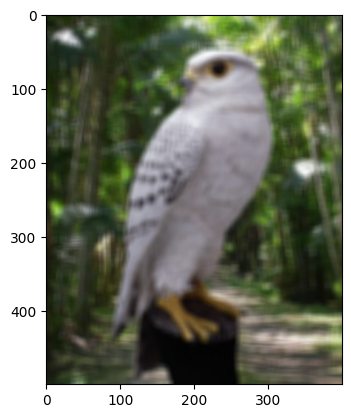

In [34]:
ksize = (10, 10)
  
# Using cv2.blur() method 

img_blur = cv2.blur(result, ksize) 

b,g,r = cv2.split(img_blur)  
img_blur = cv2.merge([r,g,b])

plt.imshow(img_blur)

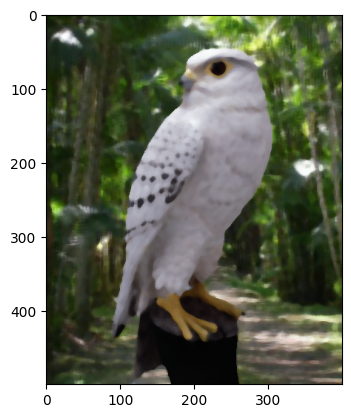

In [42]:
noise_img = np.array(255*result, dtype = 'uint8')

# Apply median filter
img_median_blur = cv2.medianBlur(noise_img,7)
b,g,r = cv2.split(img_median_blur)  
img_median_blur = cv2.merge([r,g,b])
plt.imshow(img_median_blur)

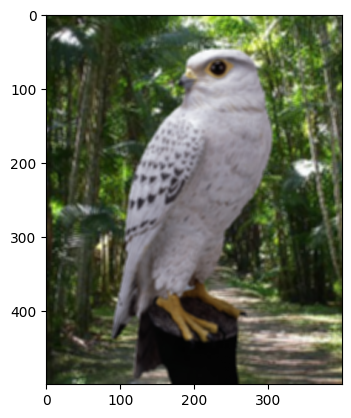

In [46]:
img_gaus = cv2.GaussianBlur(result,(5,5),3)

b,g,r = cv2.split(img_gaus)  
img_gaus = cv2.merge([r,g,b])
plt.imshow(img_gaus)